# Project: Explore Gun Deaths in the US

<br>

## Questions to address:
- What is the fraction of gun deaths in the US by gender and race?
- Since there is a large variation in the size of each race sub-population investigate gun deaths per number of individuals in each sub-population
- Investigate the fraction of Homicides by race
- Look at different causes of Gun deaths in different races
- Look at the impact of education on gun death

<br>

## Tools:
- create dataset class to contain data and access it by label
- dictionaries: frequency counts, sort and print
- plotting datetime object
- line plots
- pie charts
- subplots

<br>

## Dataset: statistics on gun death in the US between 2012 and 2014

In [1]:
from IPython.display import display
import csv
    
class Dataset:
    def __init__(self,data):
        self.header = data[0]
        self.data = data[1:]
    
    def label_idx(self, label):
        if label not in self.header:
            return None
        
        for idx, element in enumerate(self.header):
            if label==element:
                break
        return idx
        
    def column(self, label):        
        idx=self.label_idx(label)                
        return[row[idx] for row in self.data]
        
        
    def __str__(self):
        return str(self.data[:5])
    
f = open('./data/guns.csv','r')
csv_data = csv.reader(f)
csv_data=list(csv_data)

dataset = Dataset(csv_data)
data = dataset.data

print(dataset.header)
for ii in range (0,10):
    print(data[ii])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4']
['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3']
['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4']
['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']
['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']
['6', '2012', '02', 'Suicide', '0', 'M', '17', 'Native American/Native Alaskan', '100', 'Home', '1']
['7', '2012', '02', 'Undetermined', '0', 'M', '48', 'White', '100', 'Home', '2']
['8', '2012', '03', 'Suicide', '0', 'M', '41', 'Native American/Native Alaskan', '100', 'Home', '2']
['9', '2012', '02', 'Accidental', '0', 'M', '50', 'White', '100', 'Other specified', '3']
['10', '2012', '02', 'Suicide', '0', 'M', 'NA', 'Black', '998', 'Home', '5']


<br>

## Analysis: 

defaults:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

<br>

### Q1: Total number of gun deaths per year (between 2012 to 2014)

In [3]:
years=dataset.column('year')
year_counts={}

for row in years:
    if row in year_counts:
        year_counts[row]+=1
    else:
        year_counts[row]=1
        
print(year_counts)

{'2012': 33563, '2013': 33636, '2014': 33599}


The total number of gun deaths didn't seem to change significantly per year from 2012 to 2014. 

<br>

### Q2: Evolution of gun death per day in different months (between 2012 to 2014)

Plotting gun deaths per month results in a drop in February (which has less days), therefore it is more informative to look at gun death per day in different months

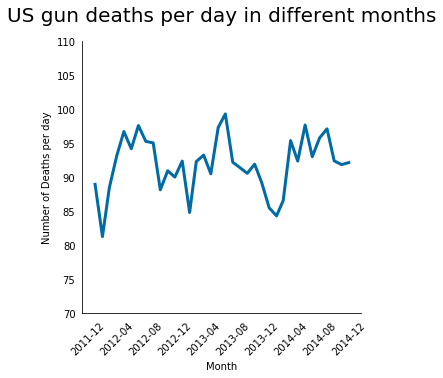

In [4]:
import datetime
import matplotlib.dates as mdates
from calendar import monthrange

dates=[datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]

#deat counts per day in different months (monthrange[1], returns number of days in a month)
death_counts={}
for element in dates:
    if element in death_counts:
        death_counts[element]+=1/(monthrange(element.year, element.month)[1])
    else:
        death_counts[element]=1/(monthrange(element.year, element.month)[1])
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
  
#axis mods
for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
#ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(rotation=45)
ax.set_ylim(70,110)
ax.set_xlabel('Month'); ax.set_ylabel('Number of Deaths per day')
ax.set_title('US gun deaths per day in different months')
      
ax.plot(death_counts.keys(), death_counts.values(), c=colors[0], linewidth=3);  

- the number of gun deaths does not seem to evolve significantly in the time scale considered

<br>

### Q3: Crime rates by gender and race: is a certain gender/race more likely to be involved in a gun death

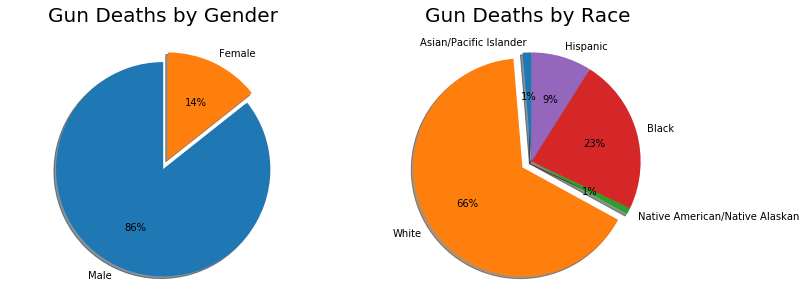

In [5]:
import numpy as np

gender_death_counts={}
for row in data:
    if row[5] in gender_death_counts:
        gender_death_counts[row[5]]+=1
    else:
        gender_death_counts[row[5]]=1

race_death_counts={}
for row in data:
    if row[7] in race_death_counts:
        race_death_counts[row[7]]+=1
    else:
        race_death_counts[row[7]]=1

#plotting    
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.pie(gender_death_counts.values(), labels=['Male', 'Female'], explode=(0.1,0),
        autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Gun Deaths by Gender')

explode = (0, 0.1, 0, 0, 0)
ax2.pie(race_death_counts.values(), labels=race_death_counts.keys(), explode=explode, 
        autopct='%1.0f%%', shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Gun Deaths by Race')

plt.show()

- Males and Whites dominate the total percentanges of gun deaths, respectively by gender and race. 
- Since the numbers of Men and Women are similar the data shows that Men are involved in most gun deaths.
- The same is not true for different racial groups that have large differences between the numbers of individuals. It would therefore be more informative to look at Gun Death per number of individuals in different races.

<br>

### Q4: The number of people in different racial groups is available in the US census

White: 197318956.00
Hispanic: 44618105.00
Black: 40250635.00
Asian/Pacific Islander: 15834141.00
Native American/Native Alaskan: 3739506.00


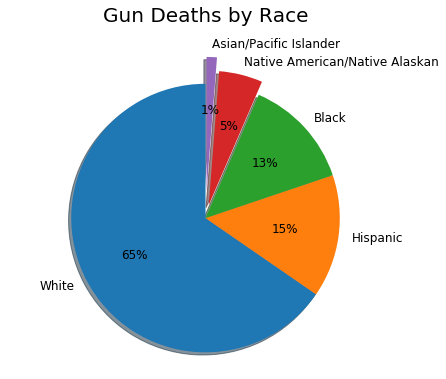

In [8]:
f=open('./data/census.csv','r')
census=list(csv.reader(f))

import re
race_counts={}

census_data=census[1]
for idx, race in enumerate(census[0]):  
        #Combine the number of Native Hawaiian and Other Pacific Islander and Asian
        if re.search('Asian',race) is not None:
            if 'Asian/Pacific Islander' in race_counts:
                race_counts['Asian/Pacific Islander']+=int(census_data[idx])
            else:
                race_counts['Asian/Pacific Islander']=int(census_data[idx])
        if re.search('Pacific',race) is not None:
            if 'Asian/Pacific Islander' in race_counts:
                race_counts['Asian/Pacific Islander']+=int(census_data[idx])
            else:
                race_counts['Asian/Pacific Islander']=int(census_data[idx])
                
        if re.search('Black',race) is not None:
            race_counts['Black']=int(census_data[idx]) 
        if re.search('Alaska',race) is not None:
            race_counts['Native American/Native Alaskan']=int(census_data[idx]) 
        if re.search('Alone - Hispanic',race) is not None:           
            race_counts['Hispanic']=int(census_data[idx]) 
        if re.search('White',race) is not None:
            race_counts['White']=int(census_data[idx])
            
#            
sorted_race_counts = sort_dict(race_counts)
print_dict(sorted_race_counts)

#plotting    
fig = plt.figure(figsize=(7,6))
ax = plt.subplot()

ax.pie(sorted_race_counts.values(), labels=race_counts.keys(), explode=(0,0,0.0,0.1,0.2), 
       autopct='%1.0f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Gun Deaths by Race')

plt.show()

<br>

### Q5: Gun Deaths by Race per sub-population size (as percentage and total number per 100 000 people)

Deaths per race per 100 000:
Black: 57.88
White: 33.57
Native American/Native Alaskan: 24.52
Hispanic: 20.22
Asian/Pacific Islander: 8.37


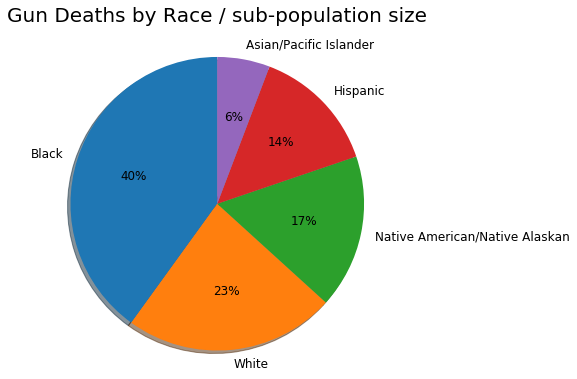

In [216]:
race_per_hundredk={}

for key, value in race_death_counts.items():
    race_per_hundredk[key]=float(value)/float(race_counts[key])*100000
   
race_per_hundredk = sort_dict(race_per_hundredk)

print('Deaths per race per 100 000:')
print_dict(race_per_hundredk)

#plotting    
fig = plt.figure(figsize=(7,6))
ax = plt.subplot()

ax.pie(race_per_hundredk.values(), labels=race_per_hundredk.keys(), 
       autopct='%1.0f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Gun Deaths by Race / sub-population size')

plt.show()

- When taking into account the size of each race sub-population the gun death percentages should be similar for different groups. 
- Asians have very low gun death rates followed by Hispanics and Native Americans. 
- Blacks represent a disproportionately large fraction of the gun deaths. 

<br>

### Q6: Homicides by race

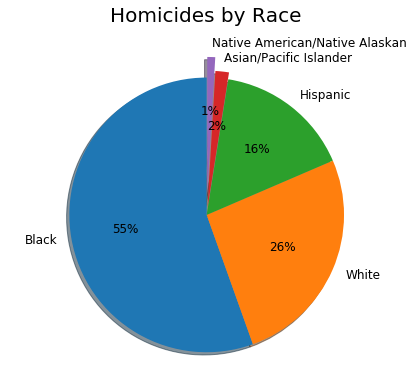

In [217]:
intents=dataset.column('intent')
races=dataset.column('race')

homicide_race_counts={}

for idx, element in enumerate (races):
    if intents[idx]=='Homicide':
        if element in homicide_race_counts:
            homicide_race_counts[element]+=1
        else:
            homicide_race_counts[element]=1

homicide_race_counts = sort_dict(homicide_race_counts)

#plotting    
fig = plt.figure(figsize=(7,6))
ax = plt.subplot()

ax.pie(homicide_race_counts.values(), labels=homicide_race_counts.keys(), explode=(0,0,0,0.05,0.15), 
       autopct='%1.0f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Homicides by Race')

plt.show()

<br>

### Q7: Homicides by Race per sub-population size (as percentage and total number per 100 000 people)

Homicides by race per 100 000:
Black: 48.47
Hispanic: 12.63
Native American/Native Alaskan: 8.72
White: 4.64
Asian/Pacific Islander: 3.53


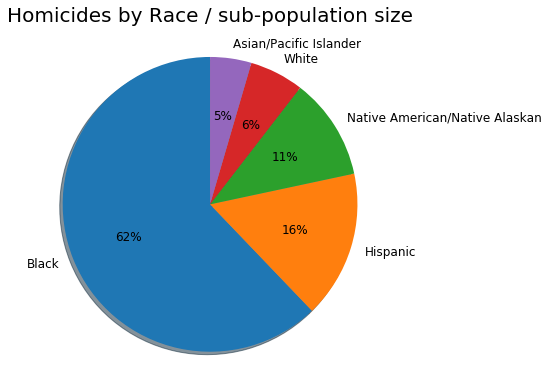

In [218]:
homicide_race_per_hundredk = {}
for key, value in homicide_race_counts.items():    
    homicide_race_per_hundredk[key]=(float(value)/float(race_counts[key]))*100000.

homicide_race_per_hundredk = sort_dict(homicide_race_per_hundredk)    
print('Homicides by race per 100 000:')    
print_dict(homicide_race_per_hundredk)

#plotting    
fig = plt.figure(figsize=(7,6))
ax = plt.subplot()

ax.pie(homicide_race_per_hundredk.values(), labels=homicide_race_per_hundredk.keys(), 
       autopct='%1.0f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Homicides by Race / sub-population size')

plt.show()

Blacks represent a disproportionate fraction of the Homicides

In [219]:
print('\nFraction of homicide gun death by race:')
for ii in race_per_hundredk.keys():
    print("%s: %0.2f" % (ii, homicide_race_per_hundredk[ii]/race_per_hundredk[ii]*100.))


Fraction of homicide gun death by race:
Black: 83.75
White: 13.81
Native American/Native Alaskan: 35.55
Hispanic: 62.45
Asian/Pacific Islander: 42.16


Most gun deaths for Asians, Whites and Native American/Native Alaskan are not homicides. What is the cause? Suicide?

<br>

### Q8: Gun Deaths by cause for whites and native americans:

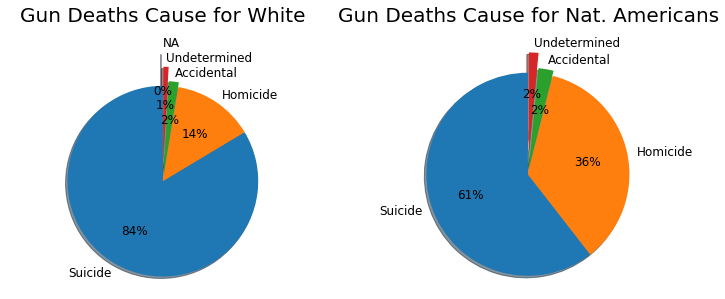

In [10]:
intent=dataset.column('intent')

intents = []
for ii in intent:
    if ii not in intents:
        intents.append(ii)
        
white_intents_count = {}
for row in data:
    if row[7] == 'White':
        if row[3] in white_intents_count:
            white_intents_count[row[3]] += 1
        else: 
            white_intents_count[row[3]] = 1            
white_intents_count = sort_dict(white_intents_count) 

native_intents_count = {}
for row in data:
    if row[7] == 'Native American/Native Alaskan':
        if row[3] in native_intents_count:
            native_intents_count[row[3]] += 1
        else: 
            native_intents_count[row[3]] = 1            
native_intents_count = sort_dict(native_intents_count) 



#plotting    
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.pie(white_intents_count.values(), labels=white_intents_count.keys(), explode=(0,0,0.05,0.2,0.35),
        autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Gun Deaths Cause for White')

ax2.pie(native_intents_count.values(), labels=native_intents_count.keys(),  explode=(0,0,0.05,0.2),
        autopct='%1.0f%%', shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Gun Deaths Cause for Nat. Americans')

plt.show()

Suicide is the most common cause of gun death among Whites and Native Americans

<br>

### Q9: Look at the impact of educations on gun deaths

In [250]:
intents=[value[3] for value in data]
education=[value[10] for value in data]
races=[value[7] for value in data]

uneducated_race_counts={}
educated_race_counts={}
for idx, element in enumerate (races):
    if intents[idx]=='Homicide':
        if education[idx]=='1':
            if element in uneducated_race_counts:
                uneducated_race_counts[element]+=1
            else:
                uneducated_race_counts[element]=1
        if education[idx]=='4':
            if element in educated_race_counts:
                educated_race_counts[element]+=1
            else:
                educated_race_counts[element]=1
            
for key, value in uneducated_race_counts.items():    
    uneducated_race_counts[key]=(float(value)/float(race_counts[key]))*100000.            
for key, value in educated_race_counts.items():    
    educated_race_counts[key]=(float(value)/float(race_counts[key]))*100000.
    
print('Uneducated:')
print_dict(uneducated_race_counts)   

print('')
print('educated:')
print_dict(educated_race_counts)

Uneducated:
Native American/Native Alaskan: 3.32
Black: 16.81
Hispanic: 6.40
White: 1.01
Asian/Pacific Islander: 0.67

educated:
Black: 1.04
White: 0.46
Asian/Pacific Islander: 0.74
Native American/Native Alaskan: 0.27
Hispanic: 0.22


Gun death is strongly correlated with low levels of education